In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

from xgboost import XGBClassifier

In [25]:
adni = pd.read_csv("data/ADNIMERGE_17Apr2025.csv")
adni

C:\Users\est.pedrogs\AppData\Local\Temp\ipykernel_29284\2962247818.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni = pd.read_csv("data/ADNIMERGE_17Apr2025.csv")


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16416,4349,ADNI3,ADNI2,018_S_4349,18,m138,2023-03-30,CN,71.4,Female,...,17.82,1.33353,NaN,1.0344,NaN,11.351100,135.93400,138,138,2023-08-22 04:58:56.0
16417,6801,ADNI3,ADNI3,041_S_6801,41,m42,2023-06-30,SMC,61.0,Female,...,NaN,NaN,NaN,1.1509,NaN,3.701570,44.32790,42,42,2023-08-25 05:00:03.0
16418,5097,ADNI3,ADNI2,041_S_5097,41,m126,2023-08-16,SMC,67.5,Male,...,16.48,1.20863,NaN,1.1086,NaN,10.371000,124.19700,126,126,2023-08-26 05:00:28.0
16419,6515,ADNI3,ADNI3,007_S_6515,7,m60,2023-08-24,SMC,89.9,Female,...,NaN,NaN,NaN,NaN,1.1475,5.004790,59.93440,60,60,2023-08-29 04:58:51.0


In [26]:
colunas = ['RID', 'VISCODE', 'DX_bl', 'DX', 'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 
           'MMSE', 'ADAS13', 'CDRSB', 'RAVLT_immediate', 'RAVLT_perc_forgetting']

df = adni[colunas].copy()
df = df[df['VISCODE'] == 'bl']
df = df.dropna()

In [27]:
le_gender = LabelEncoder()
df['PTGENDER'] = le_gender.fit_transform(df['PTGENDER'])

le_dx = LabelEncoder()
df['DX_bl'] = le_dx.fit_transform(df['DX_bl'])

In [28]:
X = df[['AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'MMSE', 'ADAS13', 'CDRSB', 'RAVLT_immediate', 'RAVLT_perc_forgetting']]
y = df['DX_bl']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42, test_size=0.2)

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
accuracy = accuracy_score(y_test, y_pred)

In [37]:
accuracy

0.6697247706422018

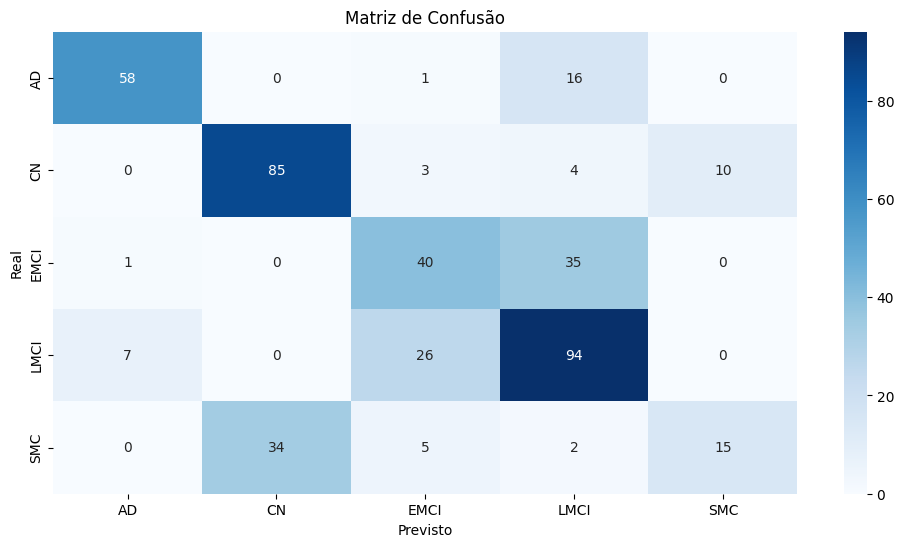

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_dx.classes_, yticklabels=le_dx.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [40]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

c:\Users\est.pedrogs\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:49:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
report_xgb = classification_report(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


In [43]:
accuracy_xgb

0.6605504587155964

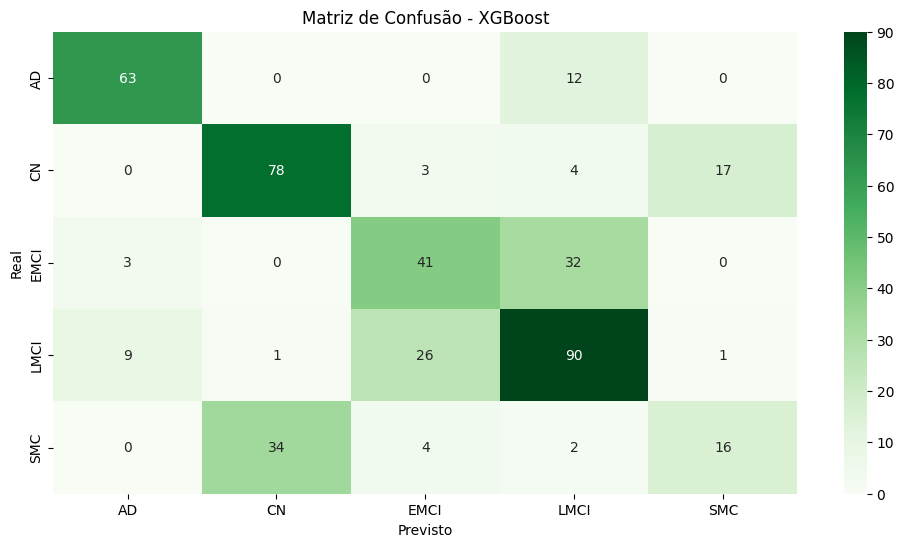

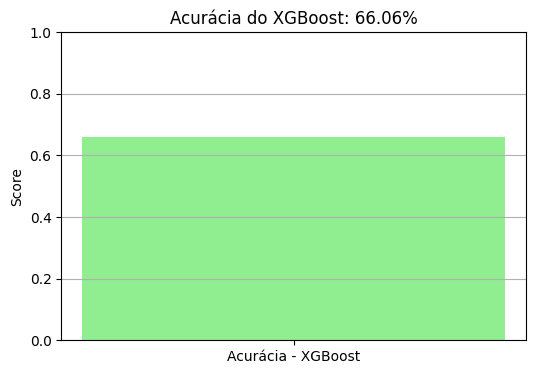

Relatório de Classificação - XGBoost:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        75
           1       0.69      0.76      0.73       102
           2       0.55      0.54      0.55        76
           3       0.64      0.71      0.67       127
           4       0.47      0.29      0.36        56

    accuracy                           0.66       436
   macro avg       0.64      0.63      0.63       436
weighted avg       0.65      0.66      0.65       436

ROC AUC (Multiclasse) - XGBoost: 0.9111


In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=le_dx.classes_, yticklabels=le_dx.classes_)
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Acurácia - XGBoost'], [accuracy_xgb], color='lightgreen')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title(f'Acurácia do XGBoost: {accuracy_xgb:.2%}')
plt.grid(axis='y')
plt.show()

print("Relatório de Classificação - XGBoost:\n")
print(report_xgb)
print(f"ROC AUC (Multiclasse) - XGBoost: {roc_xgb:.4f}")